<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rules
---

### Association Rules Overview
Association rules are a data mining technique for discovering interesting relationships between variables in large databases. They are widely used in **market basket analysis** to identify products that frequently co-occur in transactions, especially in e-commerce and retail.

For example, they can help supermarkets place related products close to each other to encourage additional purchases. A common example would be placing **laptops and mice** or **electronics and batteries** near each other, as they are often bought together.

### Market Basket Analysis
Market Basket Analysis, also known as **Association Analysis**, is a mathematical modeling technique based on the idea that if a customer buys a certain set of items, they are more likely to purchase another related set of items. It helps businesses analyze customer behavior to increase sales by identifying item combinations that frequently appear together.

### Use Cases of Association Rules

#### Market Basket Analysis

1. **Product Bundling**: Develop combo offers or discounts based on products frequently bought together to drive sales (e.g., "Buy a laptop and get a discount on a mouse").
  
2. **Store Optimization**: Organize and place associated products or categories near each other in a store. You can also place other items that you want to promote between two associated products, knowing that customers will likely look for both.
  
3. **Advertising and Marketing**: Optimize the layout of e-commerce catalogs or websites to display related products, enhancing cross-selling opportunities.
  
4. **Inventory Management**: Better control inventory by understanding which products are frequently bought together, allowing for more accurate stock predictions.

#### Recommendation Systems

- E-commerce platforms like Amazon or Netflix use association rules to recommend items that are often bought or consumed together.

#### Medical Diagnosis

- Association rules can be used to discover relationships between different medical conditions or symptoms.
- **Example**: Finding that patients with symptom A and symptom B are more likely to develop a specific condition.

#### Fraud Detection

- Association rules help detect abnormal patterns in transaction data, indicating potential fraudulent activity.
- **Example**: Identifying sequences of credit card transactions that often lead to fraud.

---

### Important Terms in Association Rules

- **Transaction**: A set of items purchased together in a single event (often called an **itemset**).
  
- **Support**: The proportion of transactions in which two or more items appear together. It represents the probability that two or more items co-occur in a transaction.
  - **Example**: If there are 10 transactions in a supermarket, and 2 of them include both bread and butter, the **support** for the rule "bread → butter" is 2/10 = 0.2 or 20%.
  - **Formula**:  
    `Support(A → B) = (Transactions containing both A and B) / (Total number of transactions)`

- **Confidence**: The conditional probability that a transaction contains item B given that it contains item A. It shows how often B appears in transactions that contain A.
  - **Formula**:  
    `Confidence(A → B) = (Transactions containing both A and B) / (Transactions containing A)`
  - **Example**: If 5 transactions contain bread, and 2 of those transactions also contain butter, the **confidence** of the rule "bread → butter" is 2/5 = 0.4 or 40%.
  
- **Lift**: Lift measures how much more likely item B is to be purchased when item A is purchased, compared to their independent occurrence. A lift greater than 1 indicates a positive association, meaning that buying A increases the chances of buying B.
  - **Formula**:  
    `Lift(A → B) = Confidence(A → B) / Support(B)`
  - **Example**: If the support for butter is 0.3 and the confidence for the rule "bread → butter" is 0.4, the **lift** is 0.4 / 0.3 = 1.33. This means customers who buy bread are 1.33 times more likely to buy butter than the general likelihood of buying butter alone.
  - **Interpretation**:
    - **Lift > 1**: Items are positively associated, and buying one increases the likelihood of buying the other.
    - **Lift < 1**: Items are negatively associated, meaning buying one decreases the chances of buying the other.

---

### Conclusion
Association rules are essential in understanding customer behavior and optimizing business processes, from marketing and inventory management to store layout and product bundling. By analyzing the relationships between products, businesses can make data-driven decisions to boost sales and enhance customer experience.


### Example of consumer’s buying preferences (Groceries)

In [1]:
# transaction ID and transactions items dataset - The groceries dataset is inbuilt in R

install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [7]:
install.packages("arulesViz")
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘seriation’, ‘ggraph’




In [3]:
data("Groceries")

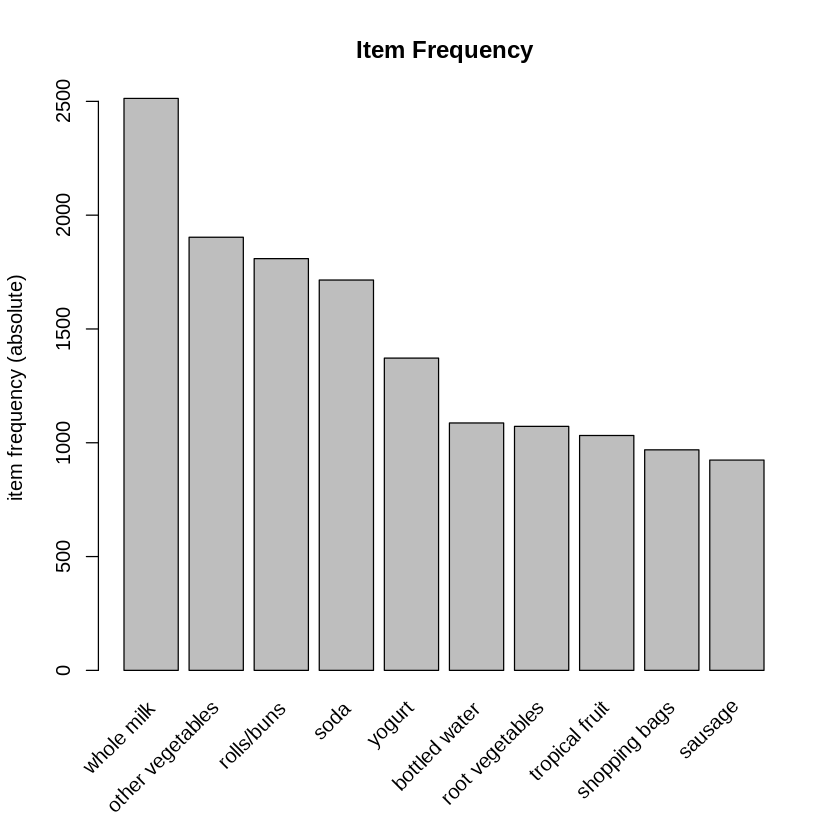

In [9]:
# Visualize Item Frequency
itemFrequencyPlot(Groceries, topN=10, type="absolute", main="Item Frequency" )

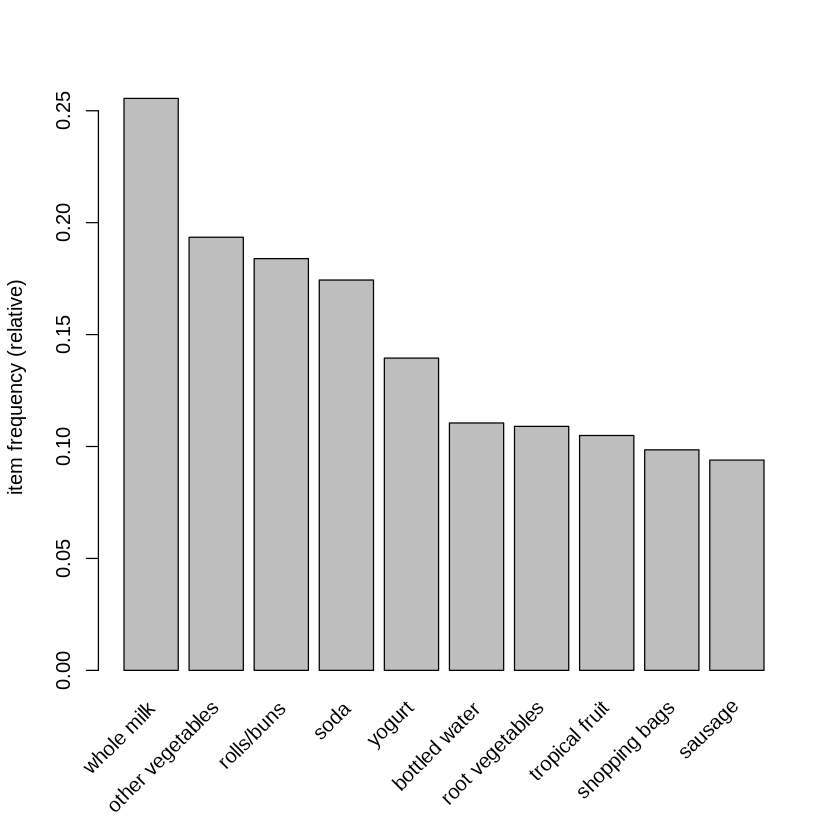

In [10]:
# Visualize Item Frequency - in relative frequency (percentage)
itemFrequencyPlot(Groceries, topN=10, type="relative")

In [11]:
# Get and Display the Rules
rules<- apriori(Groceries, parameter=list(supp=0.001, conf=0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [13]:
# Show Top 5 Rules but only 2 digits
options(digits = 2)
inspect(rules[1:5])

    lhs                         rhs            support confidence coverage lift
[1] {liquor, red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd, cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt, cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter, jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups, bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [16]:
# Sort the Rules (410 created)
rules <- sort( rules, by="lift", decreasing=TRUE)
options(digits=2)
inspect(rules[1:5])

    lhs                        rhs               support confidence coverage lift count
[1] {liquor,                                                                           
     red/blush wine}        => {bottled beer}     0.0019       0.90   0.0021 11.2    19
[2] {citrus fruit,                                                                     
     other vegetables,                                                                 
     soda,                                                                             
     fruit/vegetable juice} => {root vegetables}  0.0010       0.91   0.0011  8.3    10
[3] {tropical fruit,                                                                   
     other vegetables,                                                                 
     whole milk,                                                                       
     yogurt,                                                                           
     oil}                   => {

### Targeting Items

Association rules are valuable tools for explaining decision-making processes and forming effective strategies based on observed patterns. By identifying relationships between items, businesses can make data-driven decisions that optimize various operations such as marketing, product placement, and customer engagement.

Consider the example of consumer buying preferences in a supermarket, where **whole milk** is the reference item. Two key questions that can arise from this scenario are:

***What are customers likely to buy if they purchase whole milk?***

This question can be answered by analyzing the association rules generated from transaction data. The aim is to find items that have a strong positive correlation with the purchase of whole milk. For example, if the data shows a high confidence and lift for items like **bread** or **eggs**, then these are likely to be purchased along with whole milk.

***How can this information be utilized to form strategies?***

Understanding these associations allows businesses to create effective strategies such as:

- **Product Placement**: Items frequently bought with whole milk can be placed nearby in the store, making it easier for customers to find them and increasing the likelihood of additional purchases.

- **Combo Offers and Promotions**: Offers like "Buy whole milk and get a discount on bread" can be created to encourage bundled purchases and increase sales volume.

- **Targeted Advertising**: Customers who regularly buy whole milk could be shown ads featuring related products they are likely to buy, enhancing personalized marketing.

By leveraging these association insights, businesses can optimize their product offerings and boost sales through data-driven decisions.


In [20]:
rules<-apriori(Groceries,parameter=list(supp=0.001,conf=
0.15,minlen=2),appearance=list(default="rhs",lhs="whole milk"),control=list(verbose=FALSE))

rules<-sort(rules,decreasing=TRUE,by="confidence")

inspect(rules[1:5])

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


### Customer Purchasing Insights Based on Confidence

Based on the **confidence** metric in association rules, it can be observed that customers are most likely to purchase **other vegetables** immediately after buying **whole milk**. Confidence measures the conditional probability that a customer will buy a specific item (in this case, other vegetables) given that they have already purchased another item (whole milk).

This insight can be used to enhance store layout and marketing strategies, such as:

- **Store Layout Optimization**: Placing vegetables near the dairy section where whole milk is located can make it easier for customers to transition between these products, encouraging additional purchases.

- **Bundled Offers**: Offering discounts or promotions on vegetables for customers who purchase whole milk can drive sales of both categories.


### Visualise Rules

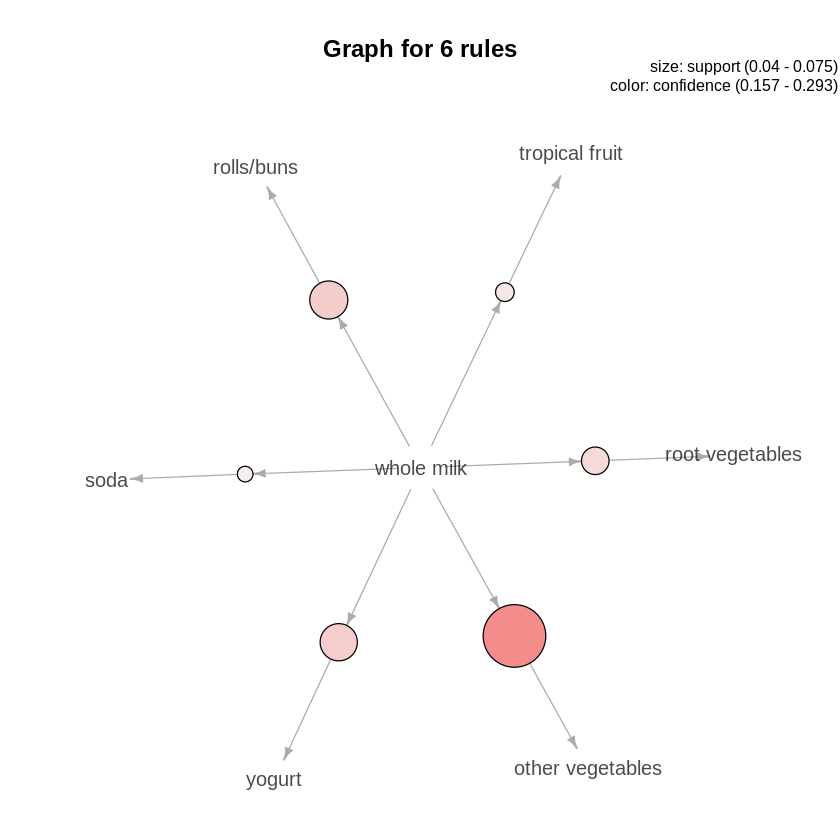

In [35]:
# Creating Interactive Graph
plot(rules, method="graph", engine='igraph', shading = 'confidence')

# Using Support, Confidence, and Lift metrics in Association Rules

**Support**, **confidence**, and **lift** are key metrics in association rule mining that help businesses make data-driven decisions. Here's how each of these can be applied effectively:

### 1. Support for Initial Recommendations and Catalog Layout
Support measures the frequency with which items appear together in transactions. It can be used to make **initial recommendations** or determine the **layout of an e-commerce catalog**. Products with high support values are more likely to be purchased together, so placing them near each other in a catalog or recommending them as a set can improve user experience and boost sales.

### 2. Confidence for Recommendations Based on First Purchase
Confidence measures how likely a customer is to buy item B given that they have already purchased item A. This metric can be used to provide **personalized recommendations** after a customer’s first purchase. For instance, if a customer buys whole milk, confidence could indicate that they are likely to buy vegetables next, guiding recommendation algorithms.

### 3. Use Rules Only If Lift is Greater Than One
Lift measures the strength of the association between two items. It compares the likelihood of buying two items together with the likelihood of buying them independently. A **lift value greater than 1** indicates a strong, positive association, meaning that purchasing one item increases the likelihood of purchasing the other. Businesses should only apply association rules if the lift is greater than 1 to ensure that the recommendations are meaningful and the products are genuinely related.


